In [1]:
import pandas as pd
import numpy as np

In [62]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
import random
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
testSet = pd.read_csv("data/TESTSET.csv")
print testSet.shape
testSet.head(10)

In [ ]:
trocafone = testSet.iloc[:,:1]
print trocafone.shape
trocafone.head()

In [ ]:
testSet = testSet.drop(columns = "person")
testSet.head(10)

In [ ]:
T = testSet.values

In [46]:
trainSet = pd.read_csv("data/TRAINSET.csv")
trainSet.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,F13_region_fh82-Mayo,F13_region_fh83-Mayo,F13_region_fh84-Mayo,F13_region_fh85-Mayo,F13_device_type_fh1-Mayo,F13_device_type_fh2-Mayo,F13_device_type_fh3-Mayo,F13_device_type_fh4-Mayo,F13_device_type_fh5-Mayo,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,1.0,0.0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [47]:
trainSet.shape

(19414, 2503)

#### SubMuestreo o undersample

0    18434
1      980
Name: label, dtype: int64


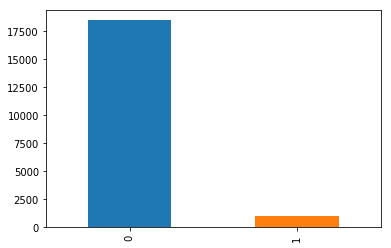

In [48]:
#Datos sin muestrear
import matplotlib.pyplot as plt
# graficos incrustados
%matplotlib inline
print trainSet['label'].value_counts()
trainSet['label'].value_counts().plot(kind= 'bar')

In [49]:
#1.Encuentra el número de muestras que son conversiones
sizeConversiones = len(trainSet[trainSet['label'] == 1]) #80/20--4   70/30---2

In [50]:
#2. Obtener índices de muestras de no conversiones.
no_conversiones_indices = trainSet[trainSet.label == 0].index 

In [51]:
#Muestras aleatorias de índices de no conversiones.
#GENERO SEMILLA CON 3 PORQUE SI, EN REALIDAD PORQUE BRINDA UN NUMERO BAJO COMO 46
np.random.seed(3)
random_indices_no_conversiones = np.random.choice(no_conversiones_indices,sizeConversiones, replace=False)

In [52]:
#4. Encuentra los índices de muestras de conversiones.
conversiones = trainSet[trainSet.label == 1].index

In [53]:
#5. Índices de conversiones concat con muestras de no conversiones.
under_sample_indices = np.concatenate([conversiones,random_indices_no_conversiones])

In [54]:
#6 Obtener Balance Dataframe
under_sample = trainSet.loc[under_sample_indices]

In [55]:
under_sample = under_sample.sort_values(by='person')
under_sample['label'].value_counts()

1    980
0    980
Name: label, dtype: int64

### Visualización de datos submuestreados

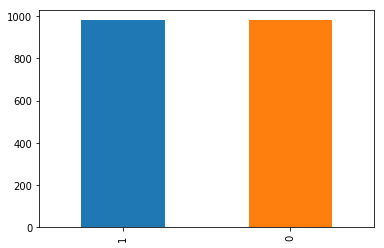

In [56]:
under_sample['label'].value_counts().plot(kind='bar')

In [57]:
print trainSet.shape
under_sample.shape
#dimensiones de trainset:(1960, 2503)

(19414, 2503)


(1960, 2503)

In [58]:
y = under_sample["label"].values
X = under_sample.iloc[:,:-1].drop(columns = "person").values

In [59]:
#Spliteo con shuffle=False es decir ordenado
X_under_train, X_under_test, y_under_train, y_under_test =\
train_test_split(X,y,test_size = 0.4,shuffle = False)

In [66]:
print(X_under_train.shape)
print(y_under_train.shape)
print(X_under_test.shape)
print(y_under_test.shape)
y_train=y_under_train
y_test=y_under_test


(1176L, 2501L)
(1176L,)
(784L, 2501L)
(784L,)


In [95]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_under_train)
X_test = scaler.transform(X_under_test)
x_train=X_train
x_test=X_test


In [64]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
X_under_train

array([[ 0.,  0.,  0., ...,  0.,  0., -1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., -1.]])

### LOGISTIC REGRESSION

In [67]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

D:\Anaconda2\envs\py2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.89
Accuracy of Logistic regression classifier on test set: 0.73


In [73]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

('Best Penalty:', 'l1')
('Best C:', 1.0)


In [75]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1.0, penalty='l1')
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.74


In [89]:
predict_final_lr=logreg.predict_proba(T)[:, 1]
predict_final_lr

array([0.9999894 , 0.89051381, 0.99996528, ..., 0.47345261, 0.99999987,
       0.52875261])

In [90]:
df_lr=trocafone.loc[:]
df_lr['label']=predict_final_lr
df_lr.head(25)

,person,label
0,00091926,0.999989
1,00091a7a,0.890514
2,000ba417,0.999965
3,000e4d9e,0.995093
4,000e619d,0.999998
5,001001be,0.999995
6,0010e89a,0.000028
7,0016c4b5,0.000038
8,001804a2,0.020667
9,001a2273,0.000316


In [92]:
df_lr.to_csv('submit_kaggle/lr_parameter_tunnig.csv', index=False)

### DECISION TREE

In [96]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.66


In [98]:
y_pred=dt.predict(x_test)

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.6638657924379652

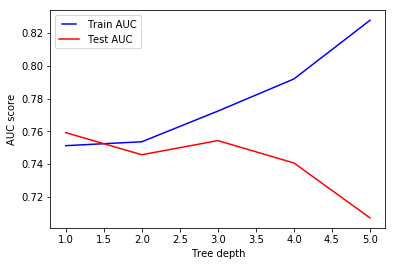

In [104]:
max_depths = np.linspace(1, 5, 5, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)

   train_pred = dt.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)

   y_pred = dt.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

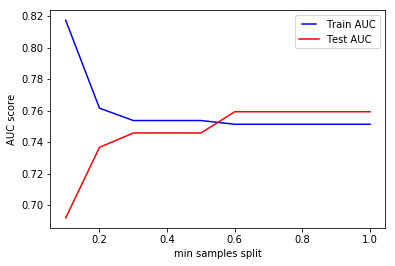

In [114]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(x_train, y_train)

   train_pred = dt.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = dt.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

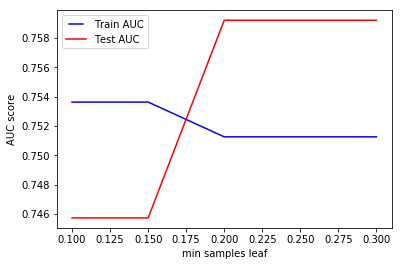

In [117]:
min_samples_leafs = np.linspace(0.1, 0.3, 5, endpoint=True)

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(x_train, y_train)

   train_pred = dt.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = dt.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [119]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(min_samples_split=0.5,min_samples_leaf=0.170,max_depth=3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))
     
y_pred=dt.predict(x_test)

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on test set: 0.74


0.7457433439898946

In [125]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_split=0.5,min_samples_leaf=0.170,max_depth=3).fit(X_train, y_train)
predict_final_dtr=dtr.predict(T)
predict_final_dtr

array([0.1910828 , 0.80606061, 0.51428571, ..., 0.80606061, 0.51428571,
       0.1910828 ])

In [126]:

df_dtr=trocafone.loc[:]
df_dtr['label']=predict_final_dtr
df_dtr.head(25)

,person,label
0,00091926,0.191083
1,00091a7a,0.806061
2,000ba417,0.514286
3,000e4d9e,0.514286
4,000e619d,0.514286
5,001001be,0.191083
6,0010e89a,0.191083
7,0016c4b5,0.191083
8,001804a2,0.191083
9,001a2273,0.191083


In [127]:
df_dtr.to_csv('submit_kaggle/dtr_parameter_tunnig.csv', index=False)

### KNeighborsClassifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.68


### LinearDiscriminantAnalysis

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.96
Accuracy of LDA classifier on test set: 0.64


D:\Anaconda2\envs\py2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### GaussianNB

In [130]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.64
Accuracy of GNB classifier on test set: 0.58


### SVC

In [72]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

D:\Anaconda2\envs\py2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier on training set: 0.68
Accuracy of SVM classifier on test set: 0.67


In [134]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [135]:
svc_param_selection(X_train, y_train,5)

{'C': 1, 'gamma': 0.01}

In [139]:
#kernels = ['linear', 'rbf', 'poly']
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.01, 0.1, 1]
    gammas = [0.001, 0.01]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
svc_param_selection(X_train, y_train,5)

{'C': 0.01, 'gamma': 0.001}

In [141]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [1,10,100,1000]
    gammas = [0.001, 0.01]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
svc_param_selection(X_train, y_train,5)

{'C': 1, 'gamma': 0.001}

In [143]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel="linear", probability=True,gamma=0.001)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.92
Accuracy of SVM classifier on test set: 0.73


In [145]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel="poly", probability=True,gamma=0.001)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.77
Accuracy of SVM classifier on test set: 0.76


In [146]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel="rbf", probability=True,gamma=0.01)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.76
